# Module 4: Searching an Image  -  Binary Image Analysis -  Recursion
****

<img src="Graphics/search_1.png">

<img src="Graphics/search_2.png">

In [70]:
#Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Saving an image. 0 for grayscale. 1 for color. -1 for color with a alpha channel. 
img = cv2.imread('Graphics/image2.png',0)

#How many elements are in that data. 
print(img.size)

#What is the shape of the array.
print(img.shape)

#What type are the elements.
print(img.dtype)

#What is the first element
print(img[0][0])

#Print my data
print(img)

225
(15, 15)
uint8
255
[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255   0 255 255 255 255 255 255 255   0 255 255 255]
 [255 255   0   0   0 255 255 255 255 255   0   0   0 255 255]
 [255 255 255   0 255 255 255 255 255 255 255   0 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255   0 255 255 255 255 255 255 255   0 255 255 255]
 [255 255 255   0 255 255 255 255 255 255 255   0 255 255 255]
 [255 255 255   0 255 255 255 255 255 255 255   0 255 255 255]
 [255 255 255   0   0   0   0   0   0   0   0   0 255 255 255]
 [255 255 255 255   0   0   0   0   0   0   0 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]]


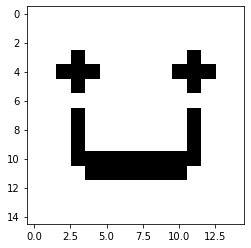

In [71]:
plt.imshow(img, cmap="gray")

In [72]:
# Convert to 0 and 1 and keep as an integer. 
img = np.uint8(img/255)

In [73]:
print(img)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1 1 0 1 1 1]
 [1 1 0 0 0 1 1 1 1 1 0 0 0 1 1]
 [1 1 1 0 1 1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1 1 0 1 1 1]
 [1 1 1 0 1 1 1 1 1 1 1 0 1 1 1]
 [1 1 1 0 1 1 1 1 1 1 1 0 1 1 1]
 [1 1 1 0 0 0 0 0 0 0 0 0 1 1 1]
 [1 1 1 1 0 0 0 0 0 0 0 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


## Results

+ 0 represents absence of material indicated by light passing.
+ 1 represents material which light has not passed. 


In [74]:
# Let's make arrays out of all the external corners.  Sepearte Varialbes to illustrate.   Excercise:  Make them 3D arrays to start.
exCorner1 = np.array([[[1,1],[1,0]]])
exCorner2 = np.array([[[1,1],[0,1]]])
exCorner3 = np.array([[[1,0],[1,1]]])
exCorner4 = np.array([[[0,1],[1,1]]])

# Combine all the external corners into one array.
exCorner = np.concatenate((exCorner1,exCorner2,exCorner3,exCorner4), axis=0)
print("The first external corner is:")
print(exCorner[0])

# Let's make arrays out of all the internal corners.
inCorner1 = np.array([[[0,0],[0,1]]])
inCorner2 = np.array([[[0,0],[1,0]]])
inCorner3 = np.array([[[0,1],[0,0]]])
inCorner4 = np.array([[[1,0],[0,0]]])

# Combine all the internal corners into one array.
inCorner = np.concatenate((inCorner1,inCorner2, inCorner3, inCorner4), axis=0)
print("The first internal corner is:")
print(inCorner[0])

The first external corner is:
[[1 1]
 [1 0]]
The first internal corner is:
[[0 0]
 [0 1]]


Number of holes: 3


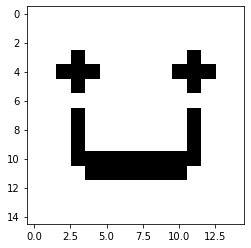

In [86]:
# Write the function to search the image for the number of holes. 
def count_holes(img):
    
    #Save the height and width.
    h = img.shape[0]
    w = img.shape[1]

    # variables to return the external and internal corner counts
    e = 0
    i = 0

    #For each row in our grid. y = row
    for y in range(0,h-1):
        #Search each pixel in the row. x = pixel
        for x in range(0,w-1):

            curFrame = np.array([[img[y,x],img[y,x + 1]],[img[y+1,x],img[y+1,x+1]]])

            # check to see if the arrays are equal.
            for n in range(0,exCorner.shape[0]):
                
                if(np.array_equal(exCorner[n], curFrame)):
                    e += 1
                if(np.array_equal(inCorner[n], curFrame)):
                    i += 1

    return(np.uint8((e-i)/4))


number_of_holes = count_holes(img)
print("Number of holes:",number_of_holes)
plt.imshow(img, cmap="gray")

## Recursion

Defining a thing in terms of itself.  For example, saying "tired" is defined as "the feeling you get when you are tired".  In our case, a function that calls itself is called a **Recursive Function**.<br>

This occurs in mathematical calucations; the most common example of this is called **"factorial"**.<br>

The factorial of any number n, usually written as n!.

n! = n * n-1 * ...* 3 * 2 * 1
0! = 1

In [76]:
def factorial(n):

    f = 1

    for i in range(0,n):
        f = f * (i+1)

    return(f)

num = factorial(4)
print(num)

24


If you look closely:<p>

4! = 4 * 3 * 2 * 1<br>
3! = 3 * 2 * 1<br>
therefore... 4! = 4 * 3!<br>

Factorial in a recursive function:

In [77]:
def factorial(n):
    if (n == 1):
        return(1)
    else:
        return n * factorial(n-1)

num = factorial(4)
print(num)

24


4 way and 8 way neighbors. Explain

<img src="Graphics/search_3.png">

<img src="Graphics/search_4.png">

<img src="Graphics/search_5.png">

### Implement the recursive connected compoments algorithm <br>

I'll give you the structure of the code and a new image to search.  Implement the rest of the code.  Reference the example above. 

In [95]:
img_connected = np.array([[1,1,0,1,1,1,0,1],[1,1,0,1,0,1,0,1],[1,1,1,1,0,0,0,1],[0,0,0,0,0,0,0,1],[1,1,1,1,0,1,0,1],[0,0,0,1,0,1,0,1],[1,1,0,1,0,0,0,1],[1,1,0,1,0,1,1,1]])
print(img_connected)

[[1 1 0 1 1 1 0 1]
 [1 1 0 1 0 1 0 1]
 [1 1 1 1 0 0 0 1]
 [0 0 0 0 0 0 0 1]
 [1 1 1 1 0 1 0 1]
 [0 0 0 1 0 1 0 1]
 [1 1 0 1 0 0 0 1]
 [1 1 0 1 0 1 1 1]]


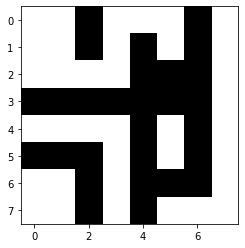

In [97]:
plt.imshow(img_connected, cmap="gray")

In [81]:
def recursive_connected_components(img):

    # convert to a signed integer so you can use negative numbers
    img = np.int8(img)

    # Negate img
    LB = img - 1

    # Define label
    label = 0

    find_components(LB, label)

    print(LB)

def find_components(LB, label):

    #Save the height and width.
    h = LB.shape[0]
    w = LB.shape[1]

    for L in range(0,h):
        for P in range(0,w):
            if(LB[L,P] == -1):
                label = label + 1
                search(LB, label, L, P)

def search(LB, label, L, P):

    LB[L,P] = label

    # Implement the rest of the algorithm 
    Nset = neighbors(L,P)

    # L', P' are the pixel locations to be compared.  Reference algorithm above.

    # For each LB[L',P'] in Nset
    #  if LB[L',P'] == -1
    #  then search(LB, label, L', P')




def neighbors(L,P):
    # What are the neighbors of this pixel.  Reference algorithm above.



negate = recursive_connected_components(img_connected)
print(negate)

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0]
 [ 0  0 -1 -1 -1  0  0  0  0  0 -1 -1 -1  0  0]
 [ 0  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0]
 [ 0  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0]
 [ 0  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0]
 [ 0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0]
 [ 0  0  0  0 -1 -1 -1 -1 -1 -1 -1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [98]:
# Open CV

# cv2.connectedComponents